### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### The steps to be followed in this exercise are as follows:

1) Reading, understanding and visualizing the data

2) Preparing the data for model training (train-test split, rescaling)

3) Training the model

4) Residual analysis

5) Prediction and evaluation of the test set

## Step 1: Reading and Understanding the Data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [1]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

###### Reading and interpreting the dataset

In [2]:
# read the data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the shape of the dataset 

day.shape

(730, 16)

In [4]:
#checking the info of the dataset 

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking the description of the dataset

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for null values

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# removing unnecessary column
day = day.drop(['instant', 'dteday'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Now that you’ve read and inspected the data, let’s move on to visualising it. This will help in interpreting 
# the data well and identifying the variables that can turn out to be useful in building the model.

##### Visualizing the numerical variables

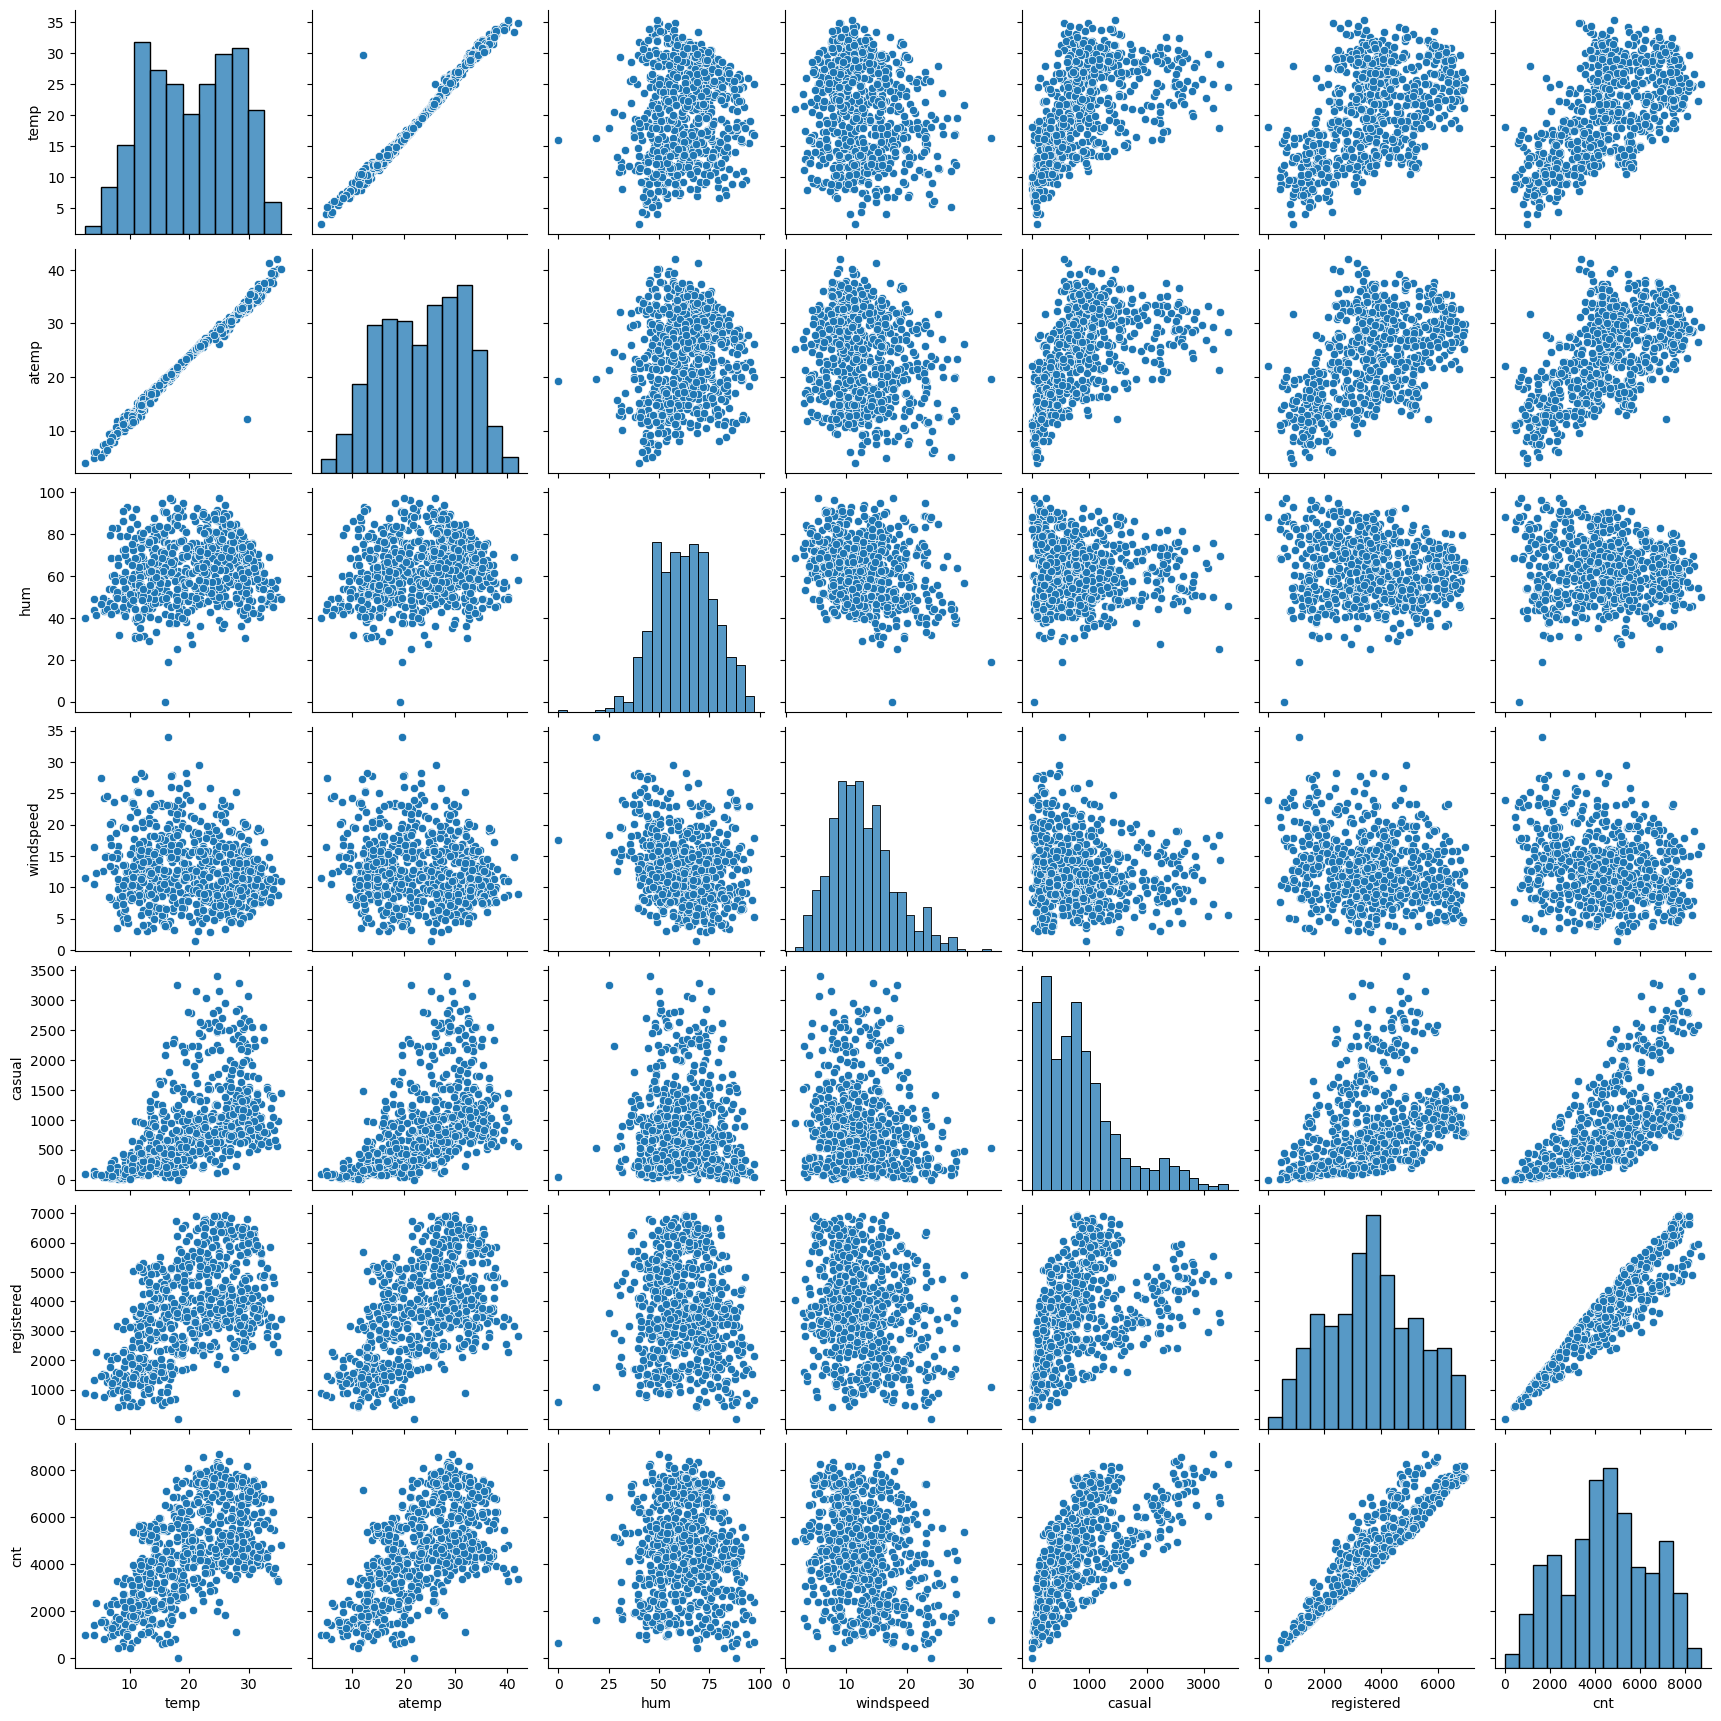

In [10]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(day, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered","cnt"])
plt.show()

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further. 

## Step2: Preparing the Data for ML Model
- Encoding:
    - Converting binary Categorical vars to 1/0
    - Other Categorical variables to dummy vars
- Splitting into train & set
- Rescaling of variables

In [11]:
# season has four levels (1:spring, 2:summer, 3:fall, 4:winter)
season = pd.get_dummies(day['season'])
season.head()

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [12]:
int_season = season.astype(int)
int_season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [13]:
int_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
 3   4       730 non-null    int64
dtypes: int64(4)
memory usage: 22.9 KB


In [14]:
season_desc = int_season.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc.sample(5)

,spring,summer,fall,winter
579,0,0,1,0
352,0,0,0,1
663,0,0,0,1
177,0,0,1,0
354,1,0,0,0


In [15]:
day = pd.concat((day, season_desc), axis=1)
day.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,winter
403,1,1,2,0,3,1,2,10.523347,13.32105,72.2917,8.959307,109,2693,2802,1,0,0,0
29,1,0,1,0,0,0,1,8.877402,12.51610,72.2174,4.956834,140,956,1096,1,0,0,0
353,4,0,12,0,2,1,2,15.819153,19.82270,59.5417,4.125244,216,3534,3750,0,0,0,1
232,3,0,8,0,0,0,1,29.144153,33.77625,77.0000,16.666518,1249,2624,3873,0,0,1,0
37,1,0,2,0,1,1,1,11.138347,15.18290,73.8333,3.042356,120,1592,1712,1,0,0,0


In [16]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'spring' and 
# the actual numeric variable 'season'
day = day.drop(['season', 'spring'], axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
510,1,5,0,6,0,1,28.392500,32.13480,73.2500,13.332464,2855,3681,6536,1,0,0
130,0,5,0,3,1,1,22.242500,26.42000,63.2917,8.083014,550,3632,4182,1,0,0
661,1,10,0,3,1,1,24.087500,27.93605,63.6250,4.876206,795,6898,7693,0,0,1
270,0,9,0,3,1,2,26.035000,28.75790,84.8750,9.958143,480,3427,3907,0,0,1
502,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118,7639,1,0,0


In [17]:
# Month has 12 levels (1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec')
month = pd.get_dummies(day['mnth'])
month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [18]:
int_month = month.astype(int)
int_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
int_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
 3   4       730 non-null    int64
 4   5       730 non-null    int64
 5   6       730 non-null    int64
 6   7       730 non-null    int64
 7   8       730 non-null    int64
 8   9       730 non-null    int64
 9   10      730 non-null    int64
 10  11      730 non-null    int64
 11  12      730 non-null    int64
dtypes: int64(12)
memory usage: 68.6 KB


In [20]:
month_desc = int_month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
month_desc.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
382,1,0,0,0,0,0,0,0,0,0,0,0
538,0,0,0,0,0,1,0,0,0,0,0,0
186,0,0,0,0,0,0,1,0,0,0,0,0
408,0,1,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
day = pd.concat((day,month_desc),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
352,0,12,0,1,1,1,11.343347,14.04665,63.7500,11.584032,...,0,0,0,0,0,0,0,0,0,1
210,0,7,0,6,0,1,32.970847,36.42685,46.5833,11.291979,...,0,0,0,0,1,0,0,0,0,0
695,1,11,0,2,1,2,11.958347,14.07790,78.6667,15.916654,...,0,0,0,0,0,0,0,0,1,0
585,1,8,0,4,1,1,30.989153,34.97540,62.0417,10.458700,...,0,0,0,0,0,1,0,0,0,0
56,0,2,0,6,0,1,11.582500,14.10960,53.7917,12.500257,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Jan' and 
# the actual numeric variable 'mnth'
day = day.drop(['mnth', 'Jan'], axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
513,1,0,2,1,1,29.622500,33.64960,68.4583,19.791800,880,...,0,0,1,0,0,0,0,0,0,0
482,1,0,6,0,2,15.443347,18.87520,48.9583,8.708325,1120,...,0,1,0,0,0,0,0,0,0,0
618,1,0,2,1,1,23.677500,27.71460,52.0000,6.167631,1070,...,0,0,0,0,0,0,1,0,0,0
359,0,1,1,0,1,13.191299,15.77675,50.6957,16.044155,430,...,0,0,0,0,0,0,0,0,0,1
312,0,0,3,1,1,16.400000,20.45395,75.8333,4.167119,305,...,0,0,0,0,0,0,0,0,1,0


In [23]:
day.shape

(730, 26)

In [24]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    int64  
 13  fall        730 non-null    int64  
 14  winter      730 non-null    int64  
 15  Feb         730 non-null    int64  
 16  March       730 non-null    int64  
 17  April       730 non-null    int64  
 18  May         730 non-null    int64  
 19  June        730 non-null    i

### Variable holiday is already encode to binary form where 

. 1 represents holiday

. 0 represents not a holiday

In [25]:
# weekday has seven levels (1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday')
weekday = pd.get_dummies(day['weekday'])
weekday.head()

,0,1,2,3,4,5,6
0,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False


In [26]:
int_weekday = weekday.astype(int)
int_weekday.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [27]:
int_weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       730 non-null    int64
 1   1       730 non-null    int64
 2   2       730 non-null    int64
 3   3       730 non-null    int64
 4   4       730 non-null    int64
 5   5       730 non-null    int64
 6   6       730 non-null    int64
dtypes: int64(7)
memory usage: 40.1 KB


In [28]:
weekday_desc = int_weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                           5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
weekday_desc.sample(5)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
263,0,0,0,1,0,0,0
131,0,0,0,0,1,0,0
17,0,0,1,0,0,0,0
350,0,0,0,0,0,0,1
365,1,0,0,0,0,0,0


In [29]:
day = pd.concat((day,weekday_desc),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
280,0,0,6,0,1,21.388347,25.66210,70.1250,3.042081,2235,...,1,0,0,0,0,0,0,0,0,1
384,1,0,5,1,2,8.917500,11.04790,45.0000,13.584250,115,...,0,0,0,0,0,0,0,0,1,0
566,1,0,6,0,3,24.429153,27.49560,86.5417,14.291100,1264,...,0,0,0,0,0,0,0,0,0,1
695,1,0,2,1,2,11.958347,14.07790,78.6667,15.916654,123,...,0,1,0,0,0,1,0,0,0,0
213,0,0,2,1,1,32.116653,35.35355,49.1250,13.791950,801,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Sunday' and 
# the actual numeric variable 'weekday'
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
535,1,0,1,1,32.082500,36.04875,59.2083,7.625404,872,5339,...,0,0,0,0,0,0,1,0,0,0
163,0,0,1,1,26.035000,30.08270,49.4583,20.458450,863,4157,...,0,0,0,0,1,0,0,0,0,0
340,0,0,1,3,16.810000,20.01230,97.0417,17.833725,50,655,...,0,0,0,1,0,0,1,0,0,0
618,1,0,1,1,23.677500,27.71460,52.0000,6.167631,1070,6697,...,1,0,0,0,0,1,0,0,0,0
52,0,0,1,1,7.471102,9.30165,57.7778,13.110761,74,1376,...,0,0,0,0,0,1,0,0,0,0


### Variable workingday is already encode to binary form where
. 1 represents neither weekend or holiday

. 0 otherwise

In [31]:
weathersit = pd.get_dummies(day['weathersit'])
weathersit.sample(5)

,1,2,3
137,False,True,False
463,True,False,False
411,False,True,False
645,False,True,False
11,True,False,False


In [32]:
int_weathersit = weathersit.astype(int)
int_weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
int_weathersit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
dtypes: int64(3)
memory usage: 17.2 KB


In [34]:
weathersit_desc = int_weathersit.rename(columns={1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
weathersit_desc.sample(5)

,Clear,Mist,Light
513,1,0,0
252,1,0,0
443,1,0,0
161,1,0,0
626,1,0,0


In [35]:
day = pd.concat((day,weathersit_desc), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
59,0,0,1,1,10.933347,13.19395,53.5000,14.500475,137,1714,...,0,0,1,0,0,0,0,1,0,0
666,1,0,1,3,18.040000,21.97000,88.0000,23.999400,2,20,...,0,1,0,0,0,0,0,0,0,1
16,0,1,0,2,7.209153,8.83855,53.7500,12.999139,117,883,...,0,1,0,0,0,0,0,0,1,0
394,1,0,1,1,11.035847,13.13125,40.0833,14.458064,126,3498,...,0,1,0,0,0,0,0,1,0,0
649,1,0,1,1,17.937500,21.65355,53.9167,15.751164,1060,6222,...,0,0,0,0,0,1,0,1,0,0


In [36]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)

In [37]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    int64  
 11  fall        730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Feb         730 non-null    int64  
 14  March       730 non-null    int64  
 15  April       730 non-null    int64  
 16  May         730 non-null    int64  
 17  June        730 non-null    int64  
 18  July        730 non-null    int64  
 19  Aug         730 non-null    i

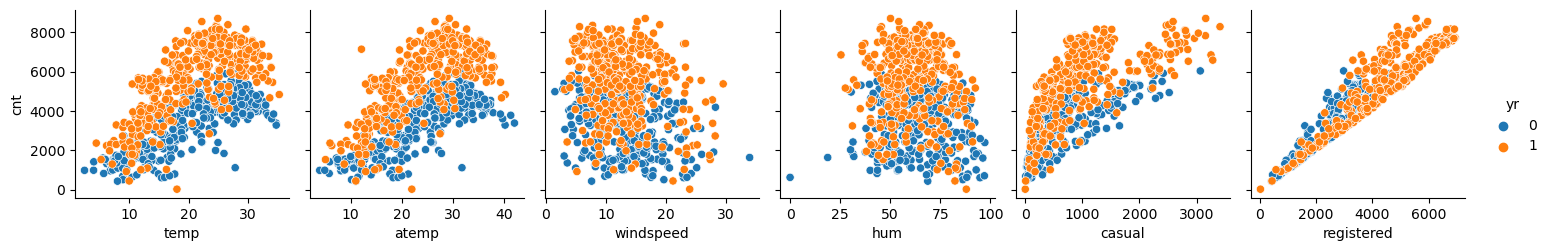

In [38]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

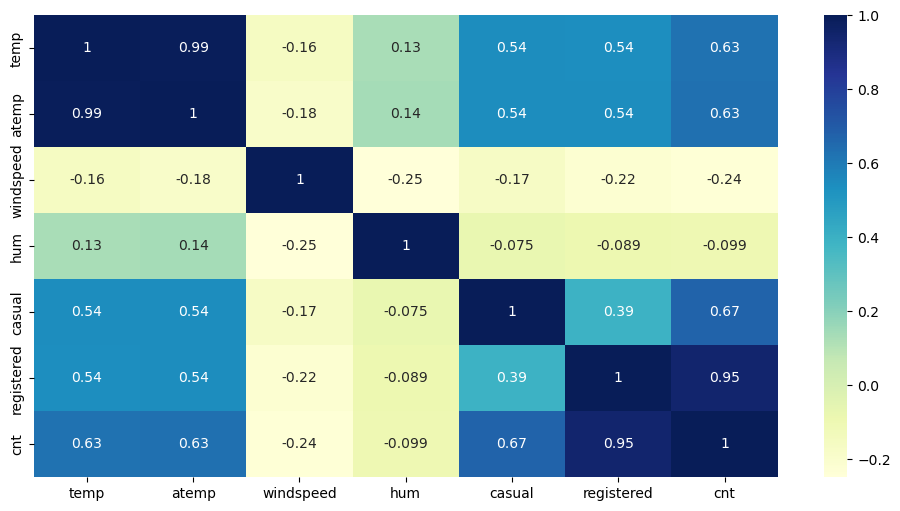

In [39]:
plt.figure(figsize = (12,6))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True, cmap="YlGnBu")
plt.show()

From Above two plot below are the observations:
* > Registered Bike users are more than Casual and is strongly correlated with Target Variable
* > Temp and atemp are very strongly correlated and one can be dropped
* > Humidity has not much Negative effect on the Target Variable.
* > Since after a user rented a Bike only we can determine He or She has registered or Casually done so both the Features are actually Target Feature
    Since we have already a Target Feature we can drop these two.

In [40]:
day = day.drop(['atemp','casual','registered'],axis =1)

In [41]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [42]:
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

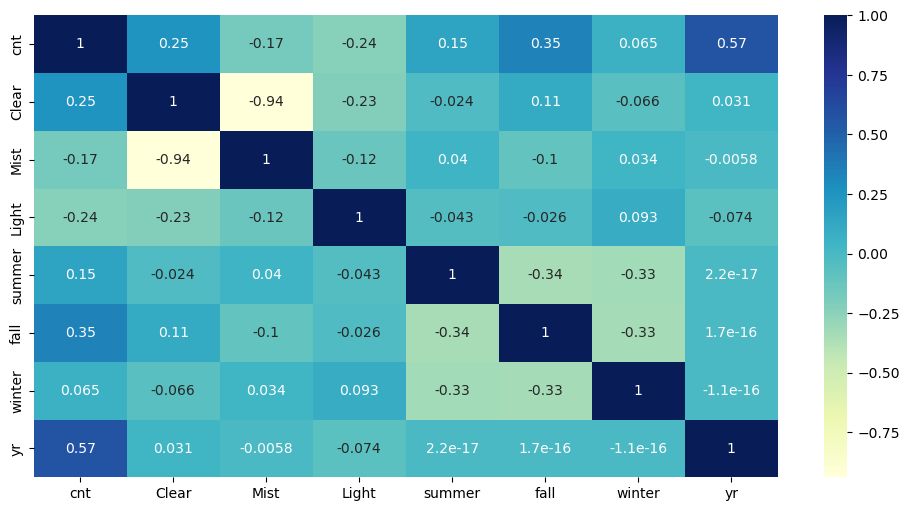

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True, cmap="YlGnBu")
plt.show()

In [44]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

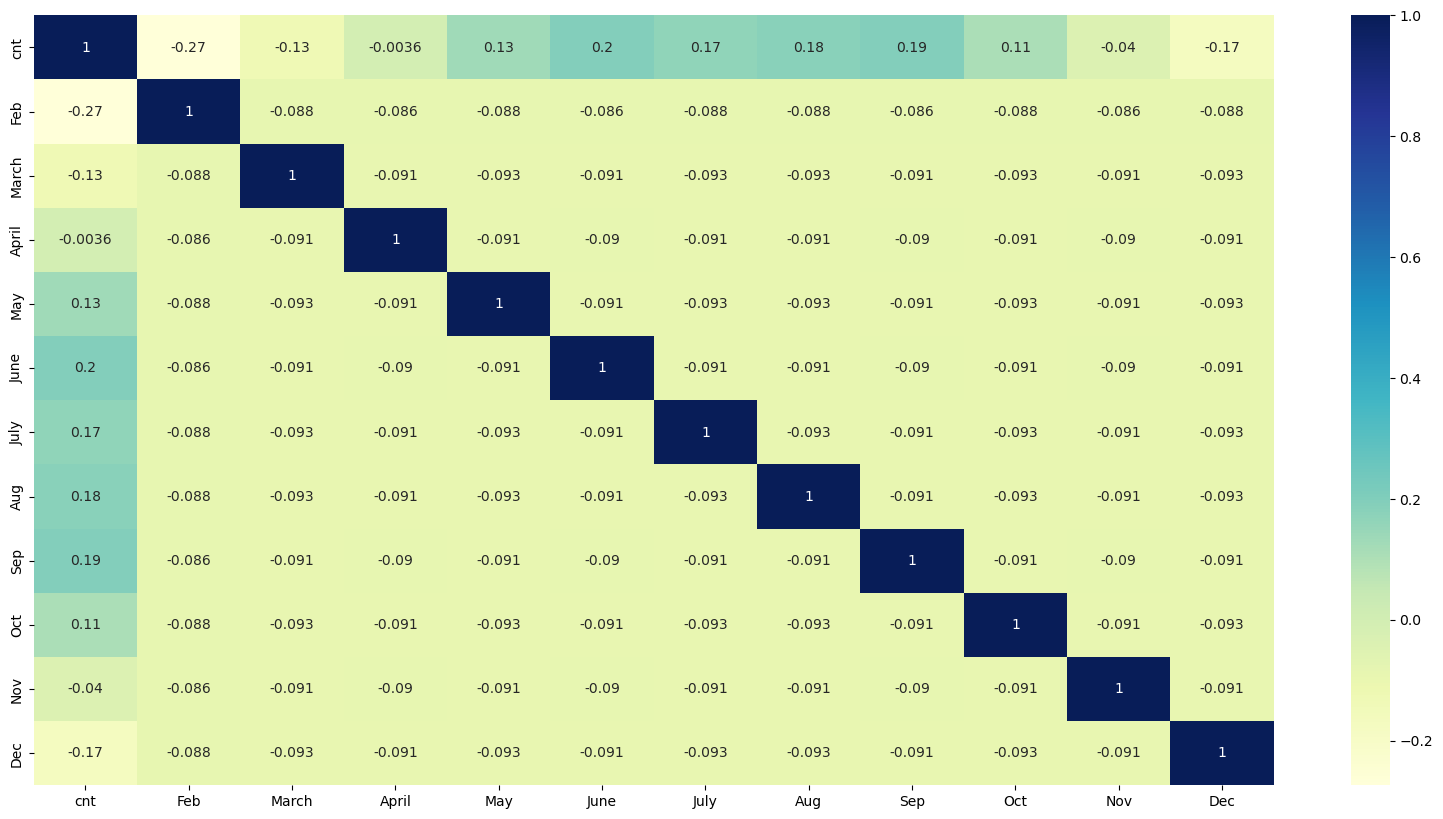

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),
            annot = True, cmap="YlGnBu")
plt.show()

* > Most number of the Bike has been rented in the Year 2019 in the month of September. 
However in the Year 2018 it was in the June Month.

* > Basically in the Winter Season BOOM Bikes can expect more demand for Rent of Bikes.

In [46]:
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

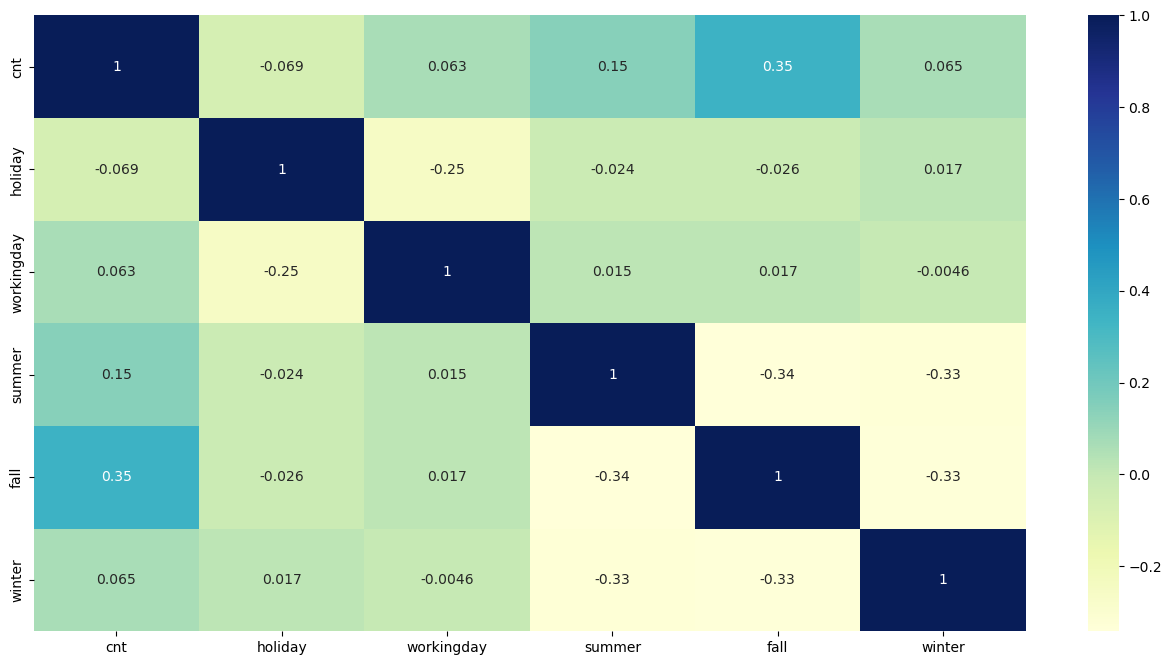

In [47]:
plt.figure(figsize = (16,8))
sns.heatmap(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True, cmap="YlGnBu")
plt.show()

> **Most of the Bike has been rented during the weekdays**

> **Rent of bike is least on the Holiday**

## Splitting into train and test 

In [48]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. All the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 & 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [49]:
# 1. Instantiate the object
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


> **We can see MinMax Scaling has been done properly for the Training Data as the Minimum
value is 0 for each of the Feature and Maximum value is 1 for each of the Feature**

## Step-3: Training the Model by using stats model

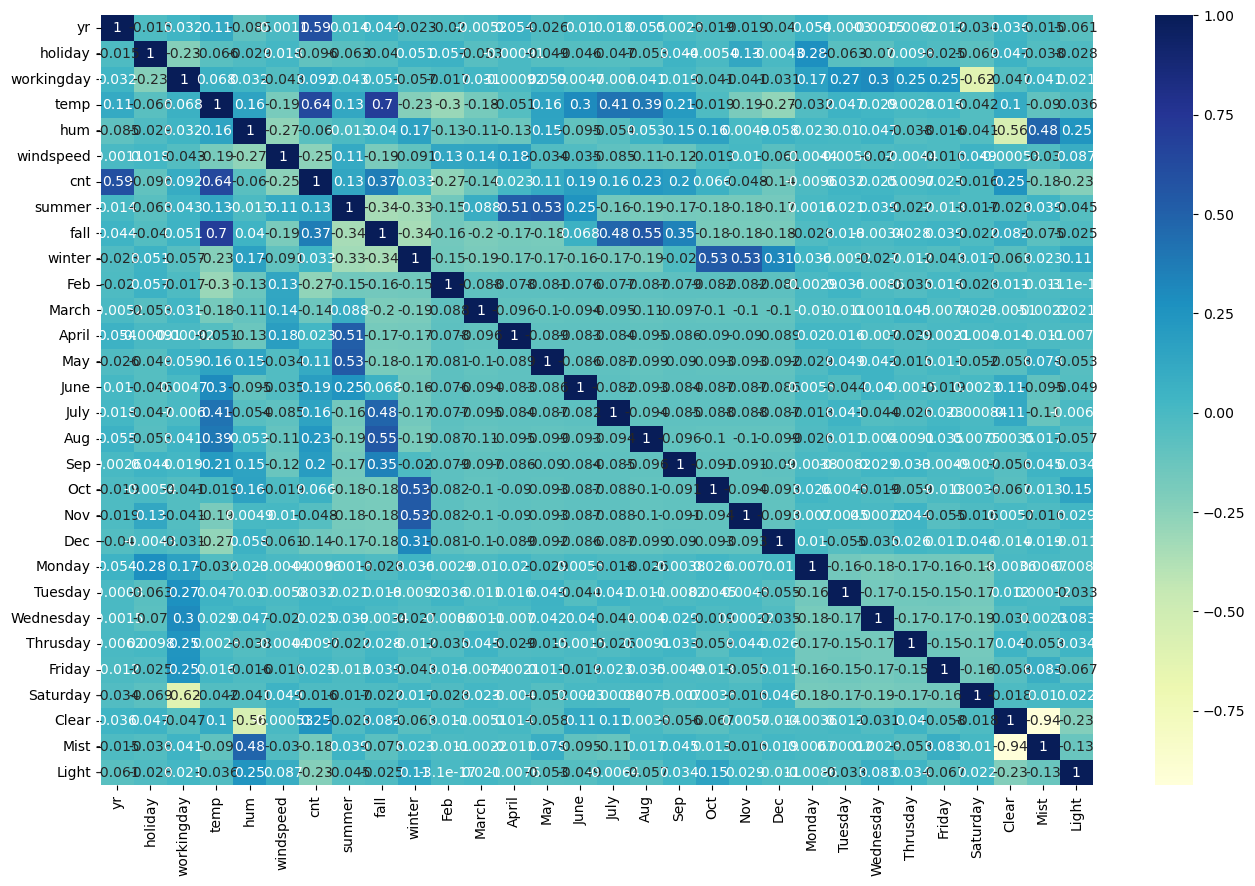

In [50]:
# heatmap
plt.figure(figsize= (16, 10))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

> **As we can see from the heatmap, the count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots**

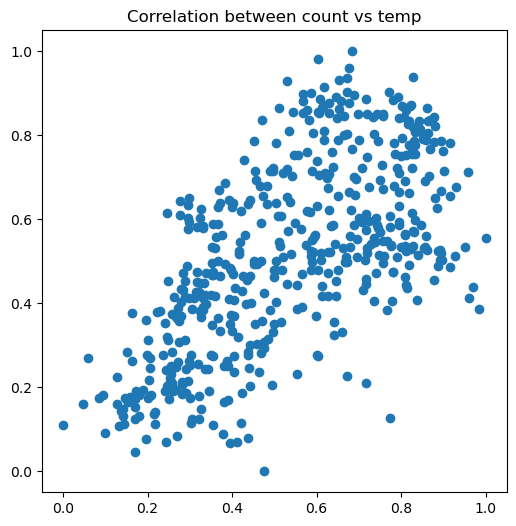

In [51]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [52]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


148    0.548320
39     0.182121
488    0.721813
574    0.756443
680    0.718707
Name: cnt, dtype: float64

In [53]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [54]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           5.80e-61
Time:                        15:07:13   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp parameter. 

* > R-squared is .414 which means 41% of the variance in the count quantity is explained by temp

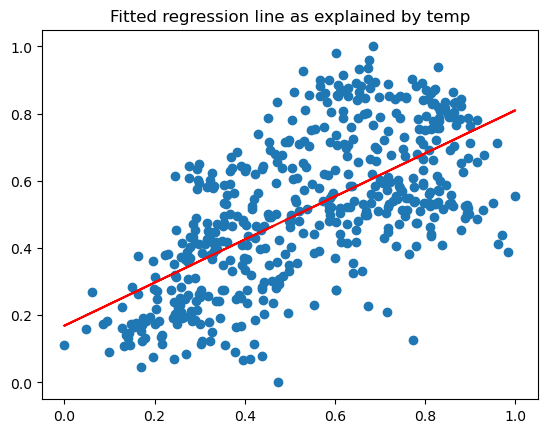

In [55]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [56]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [57]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.25e-130
Time:                        15:07:14   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is still significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp, yr parameter. 

* > R-squared is .690 which means 69% of the variance in the count quantity is explained by temperature and year data

* > Adjusted R-squared is .689 which means 68% of the variance in the count quantity is explained by temperature and year data

In [58]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [59]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.052374
yr            0.232116
holiday      -0.042974
workingday    0.043951
temp          0.450562
hum          -0.151340
windspeed    -0.186453
summer        0.086884
fall          0.048159
winter        0.154006
Feb           0.030495
March         0.063822
April         0.062777
May           0.086717
June          0.059804
July          0.022427
Aug           0.077181
Sep           0.143836
Oct           0.070310
Nov           0.020925
Dec           0.017191
Monday       -0.009827
Tuesday      -0.007810
Wednesday     0.005692
Thrusday      0.001843
Friday        0.011080
Saturday      0.054536
Clear         0.123628
Mist          0.062561
Light        -0.133815
dtype: float64

In [60]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.74e-182
Time:                        15:07:14   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0524      0.027      1.974      0.049       0.000       0.105
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday       -0.0430      0.024     -1.823      0.069      -0.089       0.003
workingday     0.0440      0.009      4.702      0.000       0.026       0.062
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
summer         0.0869      0.024      3.686      0.000       0.041       0.133
fall           0.0482      0.030      1.607      0.109      -0.011       0.107
winter         0.1540      0.026      5.939      0.000       0.103       0.205
Feb            0.0305      0.021      1.481      0.139      -0.010       0.071
March          0.0638      0.022      2.858      0.004       0.020       0.108
April          0.0628      0.034      1.873      0.062      -0.003       0.129
May            0.0867      0.036      2.401      0.017       0.016       0.158
June           0.0598      0.039      1.535      0.125      -0.017       0.136
July           0.0224      0.044      0.510      0.610      -0.064       0.109
Aug            0.0772      0.042      1.848      0.065      -0.005       0.159
Sep            0.1438      0.037      3.845      0.000       0.070       0.217
Oct            0.0703      0.034      2.044      0.041       0.003       0.138
Nov            0.0209      0.033      0.638      0.524      -0.044       0.085
Dec            0.0172      0.026      0.649      0.516      -0.035       0.069
Monday        -0.0098      0.010     -1.012      0.312      -0.029       0.009
Tuesday       -0.0078      0.011     -0.700      0.484      -0.030       0.014
Wednesday      0.0057      0.010      0.542      0.588      -0.015       0.026
Thrusday       0.0018      0.011      0.169      0.866      -0.020       0.023
Friday         0.0111      0.011      0.996      0.320      -0.011       0.033
Saturday       0.0545      0.015      3.760      0.000       0.026       0.083
Clear          0.1236      0.009     14.040      0.000       0.106       0.141
Mist           0.0626      0.012      5.372      0.000       0.040       0.085
Light         -0.1338      0.022     -6.006      0.000      -0.178      -0.090
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.22e+16
==============================================================================

N

* > R-squared is 0.853 which means 85% of the variance in the count quantity is explained with all the variables

* > Adjusted R-squared is 0.845 which means 84% of the variance in the count quantity is explained with all the variables

## Step-4: Predictions and Evaluations on test set using stats model

In [61]:
#1. create a list of numeric vars
num_vars = ['temp', 'windspeed',"hum",'cnt']

#2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

#3.View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.066667,0.249689,0.0,0.000000,0.000000,0.000000,1.0


In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [64]:
X_test_sm.shape

(219, 30)

In [65]:
# predict
lr_model.predict(X_test_sm)

184    0.392302
535    0.889564
299    0.426626
221    0.618747
152    0.588935
         ...   
400    0.332722
702    0.682130
127    0.501552
640    0.823443
72     0.307904
Length: 219, dtype: float64

In [66]:
y_test_pred = lr_model.predict(X_test_sm)

In [67]:
# Evaluate the model r2
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)

* > R-squared is 0.828 which means 82% of the variance in the count quantity is explained with all the variables

In [68]:
# Calculating adjusted R-squared
adjusted_r2 = 1-((1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1))
adjusted_r2

0.8000032665202021

* > Adjusted R-squared is 0.800 which means 80% of the variance in the count quantity is explained with all the variables

# Comparison between Training Data set and Test Data set

### . Train Dataset R^2 = 0.853
### . Test Dataset R^2 = 0.828

### . Train Dataset Adjusted R^2 = 0.845
### . Test Dataset Adjusted R^2 = 0.800